# Question Chapter 4 and 5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
#%matplotlib qt
#plt.close(fig='all')

%matplotlib inline



Multiple Choice Question:
The number of injuries per week in a particular factory is known to follow a Poisson distribution with mean 0.4. What is the probability that in a two working week period there will be no accidents? (Note injuries per week are idenpendent events)

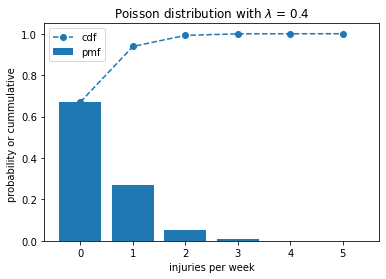

P(x=0) =  0.6703200460356393
Probability of no injuries over 2 weeks  0.4493289641172216


In [2]:
# Frozen Poisson Distribution with lambda = 0.4
# Lambda = 0.4
rv = sts.poisson(0.4)
# Let's look at the first 7 discrete values
x = np.arange(0,6)
#print(x)
plt.bar(x,rv.pmf(x))
plt.plot(x,rv.cdf(x),'o--')
plt.title('Poisson distribution with $\lambda$ = 0.4')
plt.xlabel('injuries per week')
plt.ylabel('probability or cummulative ')
plt.legend(('cdf','pmf'))
plt.show()
# No injuries in one week
print('P(x=0) = ', rv.pmf(0))
# No injuries in 2 weeks
print('Probability of no injuries over 2 weeks ', rv.pmf(0)**2)

Multiple Choice Question:
A recent survey found that 63% of all adults wear glasses for driving. In the distribution of a random sample of 20 adults , what is the mean and standard deviation of the number who wear glasses?

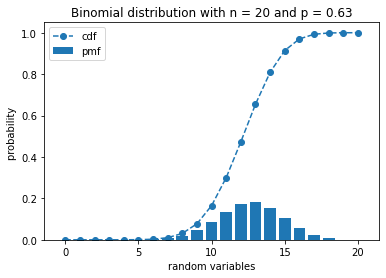

mean:  12.6
standard deviation:  2.1591665058535896


In [3]:
# Binomial distribution
# Frozen random variable distribution
rv = sts.binom(20,0.63)
# ranging form 0->20
x = np.arange(0,21)
#print(x)
fig, ax = plt.subplots()
plt.bar(x,rv.pmf(x))

plt.plot(x,rv.cdf(x),'o--')
plt.title('Binomial distribution with n = 20 and p = 0.63')
plt.xlabel('random variables')
plt.ylabel('probability ')
plt.legend(('cdf','pmf'))
plt.show()
print('mean: ', rv.mean())
print('standard deviation: ', rv.std())

Open Question:  
The weight of pralines (Neuhaus) is uniformly distributed between 16.54 grams and 23.46 grams. 50 pralines are packed in bags (the weight of the bags can be neglected).




Part 1: Calculate the probability that the weight of the filled bags is less than 981.9 grams.

Simulate data drawn for a uniform distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform and https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html

In [4]:
# Random Variable Distribution [loc loc+scale]
rv = sts.uniform(loc = 16.54, scale = (23.46-16.54))
# X is a 1000 x 50 matrix 
# each row is one sample
X = rv.rvs([1000,50])
# print first row
print(X[0,:])
# See formula chart for the mean and standard deviation
print('mean ',  (23.46+16.54)/2)
print('standard deviation', (23.46-16.54)/np.sqrt(12))
# Now use the mean and std of the froozen random variable
print('mean ',  rv.mean())
print('standard deviation', rv.std())

[21.78225409 21.98822374 18.77423948 21.01892414 19.1844546  18.26071623
 18.17500498 20.16396135 16.81802236 21.11526051 17.63685012 18.63497176
 21.59512765 17.51183564 19.31612187 18.57465044 17.52704317 19.02740647
 21.75479171 17.3783436  20.40545953 20.10002379 18.26152491 22.84362371
 17.08140774 20.71997944 19.14913536 21.07500054 22.62148443 22.28673056
 20.69289114 22.30040078 18.8510225  22.12229873 18.75285208 20.19047064
 22.56436559 20.58179946 22.5374566  20.14995068 17.60107549 19.75770115
 20.31235526 17.07475423 17.04754211 18.58596935 22.07537253 17.18615177
 17.87067371 23.43955797]
mean  20.0
standard deviation 1.9976319313961057
mean  20.0
standard deviation 1.9976319313961057


https://numpy.org/doc/stable/reference/generated/numpy.sum.html

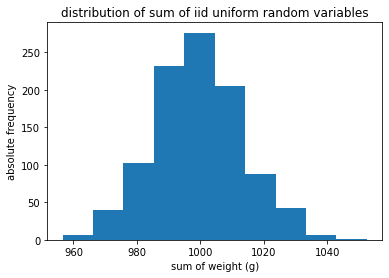

In [5]:
# Plot the histogram of the sampling distribution
# Note that it is mount shaped symmetrical
fig, ax = plt.subplots()
xt = np.sum(X,axis = 1)
plt.hist(xt,10)
plt.title('distribution of sum of iid uniform random variables')
plt.xlabel('sum of weight (g)')
plt.ylabel('absolute frequency')
plt.show()

$x_i \sim U(\mu = 20, \sigma \approx 2)$

$x_t = x_1+ \cdots + x_{50}$

$E(x_t) = E(x_1)+ \cdots + E(x_{50}) = 50.20 =1000 $

$var(x_t) = var(x_1)+ \cdots + var(x_{50})  = 50.4 = 200$

Due to the central limit theorem $x_t \sim N(\mu = 1000, \sigma = \sqrt{200})$

In [6]:
# Frozen random variable distribution
mu_t = 1000
sig_t = np.sqrt(200)
rv =  sts.norm(loc = mu_t,scale = sig_t )
print('P(x_t < 981.9)  =',rv.cdf(981.9))

P(x_t < 981.9)  = 0.10029661298331827


Part 2: 10 bags are packed in a box. Calculate the probability that a box contains 2 or more bags weighing less than 981.9 grams.


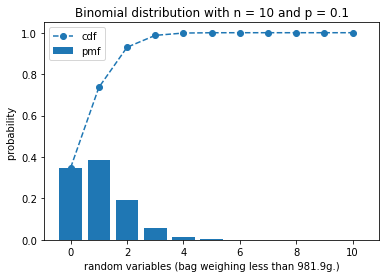

P(x>=2) =  0.26390107090000003


In [7]:
# Binomial distribution
# Frozen random variable distribution
rv = sts.binom(10,0.1)
# ranging form 0->10
x = np.arange(0,11)
# print(x)
fig, ax = plt.subplots()
plt.bar(x,rv.pmf(x))
plt.plot(x,rv.cdf(x),'o--')
plt.title('Binomial distribution with n = 10 and p = 0.1')
plt.xlabel('random variables (bag weighing less than 981.9g.)')
plt.ylabel('probability ')
plt.legend(('cdf','pmf'))
plt.show()

print('P(x>=2) = ',1-rv.cdf(1))